In [ ]:
 # mount google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Split Dataset

In [ ]:
import os
import shutil
import random

# Set paths
dataset_path = "/content/drive/MyDrive/DRdataset/Batch13/"
output_path = "/content/drive/MyDrive/DRdataset/Split_DatasetforallclassesV2"

# Create output directories
for split in ["train", "test", "val"]:
    split_path = os.path.join(output_path, split)
    os.makedirs(split_path, exist_ok=True)

# Define split ratios
train_ratio = 0.70
test_ratio = 0.15
val_ratio = 0.15

# Loop through each class folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    # Check if the path is a directory
    if os.path.isdir(class_path):
        # Get all files in the class directory
        files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        # Check if the directory has no files
        if len(files) == 0:
            print(f"⚠️ No files found in '{class_name}', skipping...")
            continue

        # Shuffle files to ensure randomness
        random.shuffle(files)

        # Compute split sizes
        train_split = int(len(files) * train_ratio)
        test_split = int(len(files) * test_ratio)

        # Assign files to each split
        train_files = files[:train_split]
        test_files = files[train_split:train_split + test_split]
        val_files = files[train_split + test_split:]

        # Move files into respective folders
        for split, file_list in zip(["train", "test", "val"], [train_files, test_files, val_files]):
            split_class_path = os.path.join(output_path, split, class_name)
            os.makedirs(split_class_path, exist_ok=True)

            for file in file_list:
                source = os.path.join(class_path, file)
                destination = os.path.join(split_class_path, file)

                try:
                    shutil.copy(source, destination)
                    print(f"✅ Copied '{file}' to '{split}/{class_name}'")
                except Exception as e:
                    print(f"❌ Failed to copy '{file}': {e}")

print("🎯 Dataset split completed successfully!")


Streaming output truncated to the last 5000 lines.
✅ Copied 'IM001191.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM001969.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM003072.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM002221.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM000863.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM001662.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM002186.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM002024.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM003015.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM000572.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM001000.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM002078.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM001190.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM001401.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM000933.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM002510.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM002961.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM001288.JPG' to 'train/R0-M0-Normal Eye'
✅ Copied 'IM0

In [ ]:
import os

# Define the dataset path (Change this according to your dataset location in Colab)
dataset_path = "/content/drive/MyDrive/DRdataset/Split_DatasetforallclassesV2/val/"  # Change to test or val if needed

# Dictionary to store image counts per folder
image_counts = {}

# Supported image file extensions
image_extensions = (".jpg", ".jpeg", "JPG",".png", ".bmp", ".tiff")

# Loop through each folder in the dataset path
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Count the number of image files in the folder
        image_count = len([f for f in os.listdir(folder_path) if f.lower().endswith(image_extensions)])
        image_counts[folder] = image_count

# Print the results
for folder, count in image_counts.items():
    print(f"Folder: {folder}, Number of images: {count}")

# Print total number of images across all folders
total_images = sum(image_counts.values())
print(f"\nTotal images across all folders: {total_images}")


Folder: R2-M0-Moderate DR, Number of images: 33
Folder: R2-M1-Severe DR, Number of images: 23
Folder: R3-M1-PDR, Number of images: 202
Folder: Not DR, Number of images: 230
Folder: R0-M0-Normal Eye, Number of images: 385
Folder: R1-M0-Mild DR, Number of images: 84
Folder: R1-M1-Mild DR, Number of images: 151
Folder: R2-M0-Severe DR, Number of images: 2
Folder: R2-M1-Moderate DR, Number of images: 142
Folder: R3-M0-PDR, Number of images: 23

Total images across all folders: 1275


In [ ]:
data_dir = "/content/drive/MyDrive/DRdataset/Split_DatasetforallclassesV2/train"

data_dir_val = "/content/drive/MyDrive/DRdataset/Split_DatasetforallclassesV2/val"
data_dir_test = "/content/drive/MyDrive/DRdataset/Split_DatasetforallclassesV2/test"

Found 5910 images belonging to 10 classes.
Found 1279 images belonging to 10 classes.
Found 1264 images belonging to 10 classes.
Class weights: {0: np.float64(0.5538894095595126), 1: np.float64(0.3272425249169435), 2: np.float64(1.5310880829015545), 3: np.float64(0.8454935622317596), 4: np.float64(3.966442953020134), 5: np.float64(295.5), 6: np.float64(0.9009146341463414), 7: np.float64(5.737864077669903), 8: np.float64(5.794117647058823), 9: np.float64(0.6287234042553191)}
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - AUC: 0.5684 - accuracy: 0.1407 - loss: 3.1571 - precision: 0.2104 - recall: 0.0700 
Epoch 1: val_accuracy improved from -inf to 0.27756, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 5754s 29s/step - AUC: 0.5686 - accuracy: 0.1409 - loss: 3.1559 - precision: 0.2108 - recall: 0.0701 - val_AUC: 0.7235 - val_accuracy: 0.2776 - val_loss: 2.1438 - val_precision: 0.6732 - val_recall: 0.2158 - learning_rate: 1.0000e-04
Epoch 2/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.6376 - accuracy: 0.2048 - loss: 2.3683 - precision: 0.3775 - recall: 0.0922
Epoch 2: val_accuracy did not improve from 0.27756
185/185 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - AUC: 0.6376 - accuracy: 0.2048 - loss: 2.3688 - precision: 0.3777 - recall: 0.0922 - val_AUC: 0.6827 - val_accuracy: 0.2056 - val_loss: 2.0911 - val_precision: 0.6296 - val_recall: 0.0930 - learning_rate: 1.0000e-04
Epoch 3/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.6646 - accuracy: 0.2265 - loss: 2.5677 - precision: 0.4102 - recall: 0.1137
Epoch 3: val_accuracy improved from 0.27756 to 0.28069, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - AUC: 0.6646 - accuracy: 0.2265 - loss: 2.5671 - precision: 0.4102 - recall: 0.1137 - val_AUC: 0.7388 - val_accuracy: 0.2807 - val_loss: 1.9611 - val_precision: 0.6154 - val_recall: 0.1501 - learning_rate: 1.0000e-04
Epoch 4/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.6743 - accuracy: 0.2367 - loss: 2.1350 - precision: 0.4889 - recall: 0.1161
Epoch 4: val_accuracy improved from 0.28069 to 0.32134, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - AUC: 0.6743 - accuracy: 0.2367 - loss: 2.1354 - precision: 0.4889 - recall: 0.1161 - val_AUC: 0.7624 - val_accuracy: 0.3213 - val_loss: 1.9448 - val_precision: 0.6894 - val_recall: 0.1736 - learning_rate: 1.0000e-04
Epoch 5/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.6859 - accuracy: 0.2535 - loss: 2.3177 - precision: 0.5234 - recall: 0.1315
Epoch 5: val_accuracy improved from 0.32134 to 0.37608, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - AUC: 0.6859 - accuracy: 0.2534 - loss: 2.3175 - precision: 0.5233 - recall: 0.1315 - val_AUC: 0.7958 - val_accuracy: 0.3761 - val_loss: 1.8743 - val_precision: 0.6230 - val_recall: 0.1861 - learning_rate: 1.0000e-04
Epoch 6/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7224 - accuracy: 0.2853 - loss: 2.2663 - precision: 0.5443 - recall: 0.1407
Epoch 6: val_accuracy improved from 0.37608 to 0.42377, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - AUC: 0.7224 - accuracy: 0.2854 - loss: 2.2652 - precision: 0.5443 - recall: 0.1408 - val_AUC: 0.8310 - val_accuracy: 0.4238 - val_loss: 1.7082 - val_precision: 0.7781 - val_recall: 0.1837 - learning_rate: 1.0000e-04
Epoch 7/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7756 - accuracy: 0.3556 - loss: 1.8289 - precision: 0.6074 - recall: 0.1909
Epoch 7: val_accuracy improved from 0.42377 to 0.44253, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - AUC: 0.7755 - accuracy: 0.3555 - loss: 1.8298 - precision: 0.6073 - recall: 0.1909 - val_AUC: 0.8502 - val_accuracy: 0.4425 - val_loss: 1.6278 - val_precision: 0.6574 - val_recall: 0.2400 - learning_rate: 1.0000e-04
Epoch 8/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7745 - accuracy: 0.3403 - loss: 1.8599 - precision: 0.5943 - recall: 0.1920
Epoch 8: val_accuracy improved from 0.44253 to 0.49257, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - AUC: 0.7746 - accuracy: 0.3404 - loss: 1.8602 - precision: 0.5944 - recall: 0.1920 - val_AUC: 0.8520 - val_accuracy: 0.4926 - val_loss: 1.8363 - val_precision: 0.6839 - val_recall: 0.3198 - learning_rate: 1.0000e-04
Epoch 9/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7302 - accuracy: 0.3019 - loss: 2.2176 - precision: 0.5733 - recall: 0.1776
Epoch 9: val_accuracy did not improve from 0.49257
185/185 ━━━━━━━━━━━━━━━━━━━━ 411s 2s/step - AUC: 0.7303 - accuracy: 0.3019 - loss: 2.2167 - precision: 0.5733 - recall: 0.1775 - val_AUC: 0.8661 - val_accuracy: 0.4644 - val_loss: 1.5294 - val_precision: 0.7957 - val_recall: 0.2314 - learning_rate: 1.0000e-04
Epoch 10/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7918 - accuracy: 0.3508 - loss: 1.8373 - precision: 0.5721 - recall: 0.2028
Epoch 10: val_accuracy did not improve from 0.49257
185/185 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - AUC: 0.7917 - accuracy: 0.3508 - loss: 1.8375 - precision: 0

185/185 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - AUC: 0.7927 - accuracy: 0.3802 - loss: 2.0561 - precision: 0.6305 - recall: 0.2157 - val_AUC: 0.8787 - val_accuracy: 0.5199 - val_loss: 1.4363 - val_precision: 0.7846 - val_recall: 0.2877 - learning_rate: 1.0000e-04
Epoch 13/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7692 - accuracy: 0.3445 - loss: 1.8874 - precision: 0.5686 - recall: 0.1906
Epoch 13: val_accuracy did not improve from 0.51994
185/185 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - AUC: 0.7692 - accuracy: 0.3445 - loss: 1.8876 - precision: 0.5687 - recall: 0.1906 - val_AUC: 0.8625 - val_accuracy: 0.4894 - val_loss: 1.5536 - val_precision: 0.7326 - val_recall: 0.2635 - learning_rate: 1.0000e-04
Epoch 14/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8131 - accuracy: 0.3992 - loss: 1.6791 - precision: 0.6032 - recall: 0.2301
Epoch 14: val_accuracy did not improve from 0.51994
185/185 ━━━━━━━━━━━━━━━━━━━━ 408s 2s/step - AUC: 0.8132 - accuracy: 0.3992 - loss: 1.6795 - precision:

185/185 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - AUC: 0.8584 - accuracy: 0.4566 - loss: 1.5257 - precision: 0.6383 - recall: 0.2999 - val_AUC: 0.9009 - val_accuracy: 0.5606 - val_loss: 1.3848 - val_precision: 0.7879 - val_recall: 0.3659 - learning_rate: 1.0000e-04
Epoch 17/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8784 - accuracy: 0.4972 - loss: 1.3899 - precision: 0.6772 - recall: 0.3303
Epoch 17: val_accuracy improved from 0.56059 to 0.56763, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - AUC: 0.8784 - accuracy: 0.4972 - loss: 1.3901 - precision: 0.6771 - recall: 0.3304 - val_AUC: 0.8984 - val_accuracy: 0.5676 - val_loss: 1.3679 - val_precision: 0.7594 - val_recall: 0.3800 - learning_rate: 1.0000e-04
Epoch 18/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8811 - accuracy: 0.5150 - loss: 1.3796 - precision: 0.6835 - recall: 0.3558
Epoch 18: val_accuracy improved from 0.56763 to 0.57310, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - AUC: 0.8812 - accuracy: 0.5150 - loss: 1.3795 - precision: 0.6834 - recall: 0.3558 - val_AUC: 0.9113 - val_accuracy: 0.5731 - val_loss: 1.2891 - val_precision: 0.7525 - val_recall: 0.4159 - learning_rate: 1.0000e-04
Epoch 19/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8862 - accuracy: 0.5090 - loss: 1.2831 - precision: 0.6486 - recall: 0.3591
Epoch 19: val_accuracy improved from 0.57310 to 0.58327, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - AUC: 0.8862 - accuracy: 0.5090 - loss: 1.2832 - precision: 0.6486 - recall: 0.3592 - val_AUC: 0.9106 - val_accuracy: 0.5833 - val_loss: 1.3494 - val_precision: 0.7258 - val_recall: 0.4285 - learning_rate: 1.0000e-04
Epoch 20/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8961 - accuracy: 0.5452 - loss: 1.2569 - precision: 0.7022 - recall: 0.4051
Epoch 20: val_accuracy did not improve from 0.58327
185/185 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - AUC: 0.8960 - accuracy: 0.5450 - loss: 1.2578 - precision: 0.7020 - recall: 0.4050 - val_AUC: 0.8606 - val_accuracy: 0.5059 - val_loss: 1.7064 - val_precision: 0.6527 - val_recall: 0.3909 - learning_rate: 1.0000e-04
Epoch 21/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8748 - accuracy: 0.4931 - loss: 1.4169 - precision: 0.6368 - recall: 0.3578
Epoch 21: val_accuracy did not improve from 0.58327
185/185 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - AUC: 0.8748 - accuracy: 0.4931 - loss: 1.4172 - precision:

Model saved at: /content/drive/MyDrive/DRdataset/modelsforallclasses/densenet201_conv_classifier_finetuned.h5


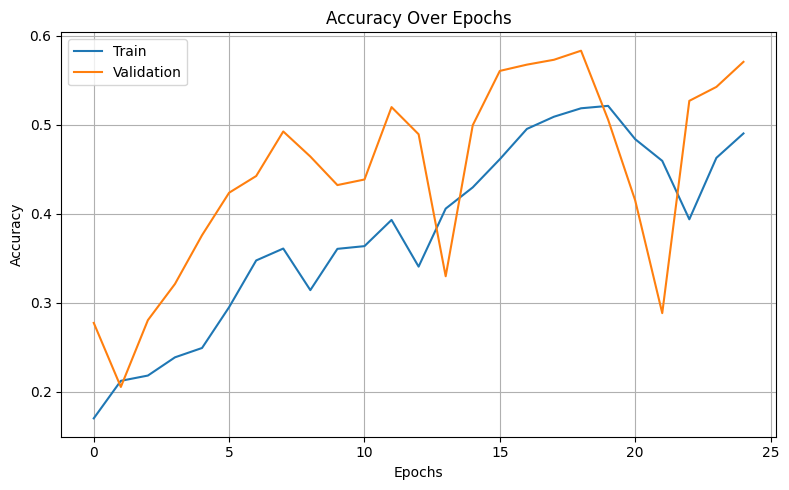

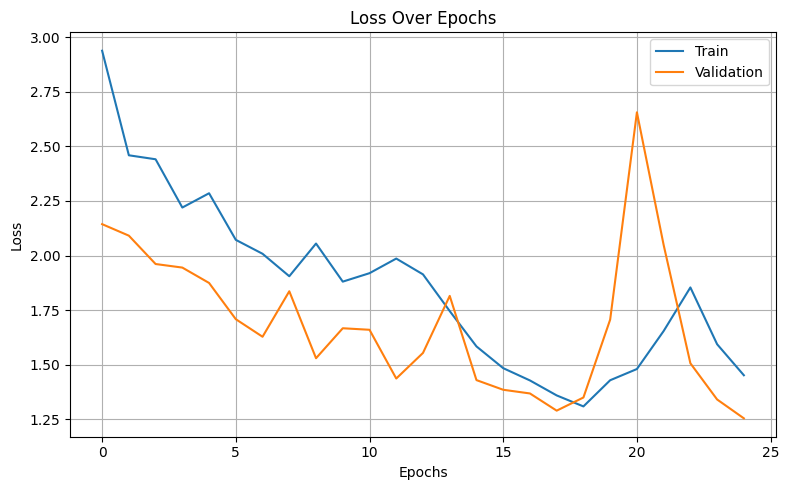

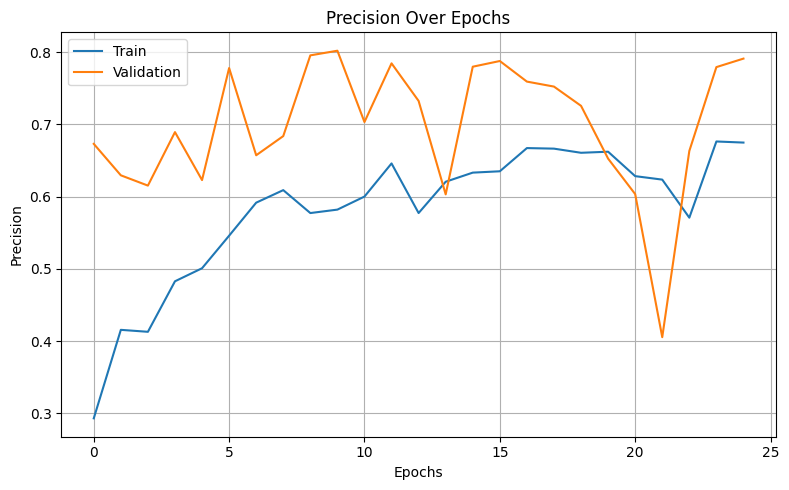

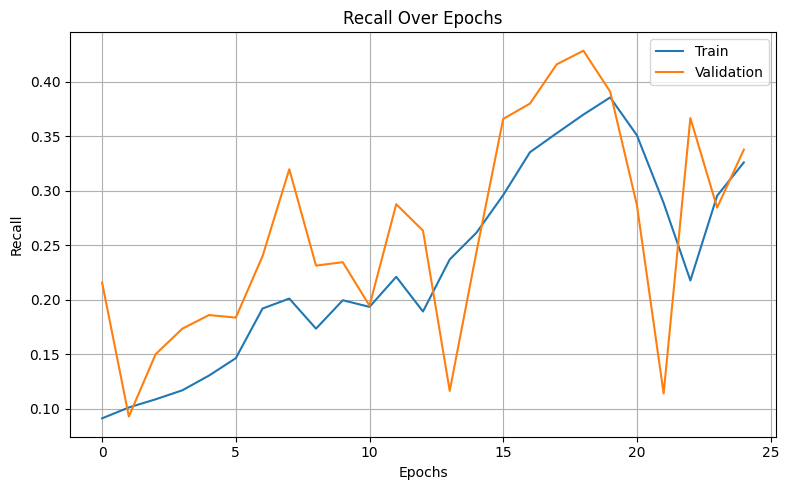

40/40 ━━━━━━━━━━━━━━━━━━━━ 884s 22s/step


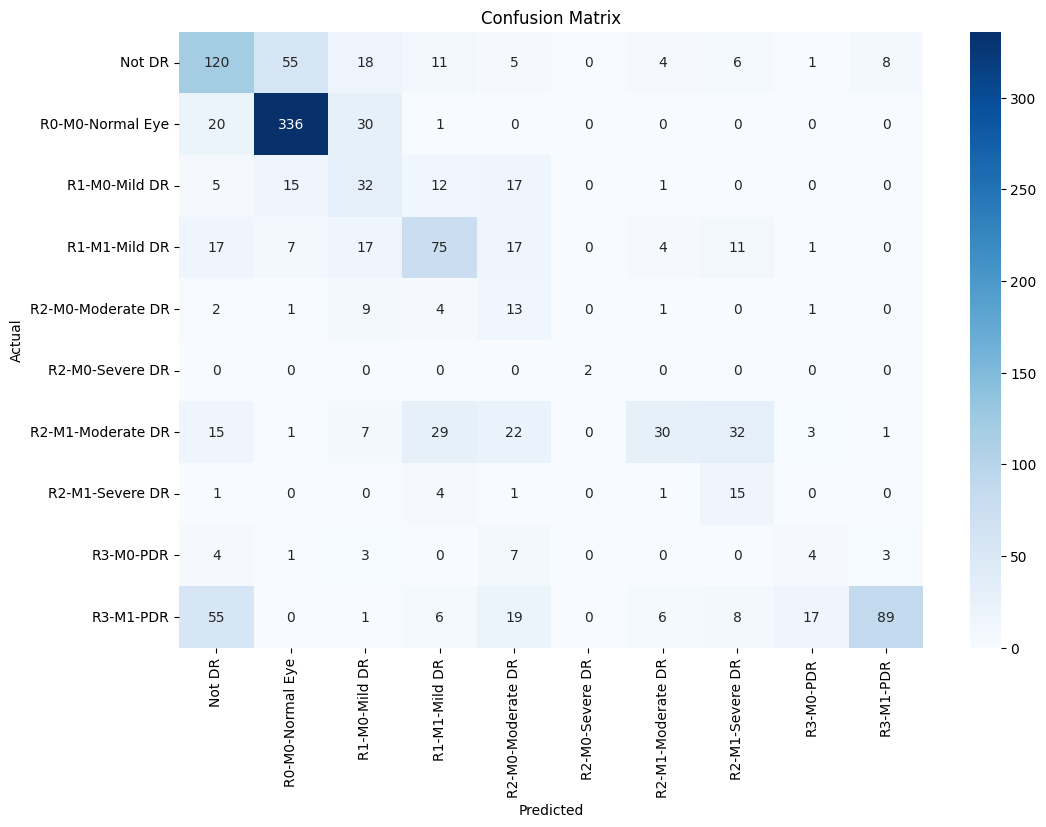


Classification Report:
                   precision    recall  f1-score   support

           Not DR       0.50      0.53      0.51       228
 R0-M0-Normal Eye       0.81      0.87      0.84       387
    R1-M0-Mild DR       0.27      0.39      0.32        82
    R1-M1-Mild DR       0.53      0.50      0.52       149
R2-M0-Moderate DR       0.13      0.42      0.20        31
  R2-M0-Severe DR       1.00      1.00      1.00         2
R2-M1-Moderate DR       0.64      0.21      0.32       140
  R2-M1-Severe DR       0.21      0.68      0.32        22
        R3-M0-PDR       0.15      0.18      0.16        22
        R3-M1-PDR       0.88      0.44      0.59       201

         accuracy                           0.57      1264
        macro avg       0.51      0.52      0.48      1264
     weighted avg       0.64      0.57      0.57      1264



In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# ========== Parameters ==========
batch_size = 32
epochs = 50
img_height, img_width = 224, 224
num_classes = 10
learning_rate = 1e-4

# ========== Dataset Paths ==========
# ========== Data Augmentation ==========
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    data_dir_val,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# ========== Class Weights ==========
class_indices = train_data.classes
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_indices),
    y=class_indices
)
class_weights = dict(enumerate(class_weights_array))
print("Class weights:", class_weights)

# ========== Model Architecture ==========
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze last 150 layers
for layer in base_model.layers[:-150]:
    layer.trainable = True


x = base_model.output

# Custom Conv Block
x = Conv2D(512, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# ========== Callbacks ==========
early_stopping = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# ========== Train Model ==========
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# ========== Save Final Model ==========
model_save_path = '/content/drive/MyDrive/DRdataset/modelsforallclasses/densenet201_conv_classifier_finetuned.h5'
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")

# ========== Plot Training History ==========
def plot_history(hist):
    metrics = ['accuracy', 'loss', 'auc', 'precision', 'recall']
    for metric in metrics:
        if metric in hist.history:
            plt.figure(figsize=(8, 5))
            plt.plot(hist.history[metric], label='Train')
            plt.plot(hist.history[f'val_{metric}'], label='Validation')
            plt.title(f'{metric.capitalize()} Over Epochs')
            plt.xlabel('Epochs')
            plt.ylabel(metric.capitalize())
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

plot_history(history)

# ========== Evaluate on Test Set ==========
pred_probs = model.predict(test_data)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_data.classes
labels = list(test_data.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=labels))


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2.0, alpha=None):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1.0 - K.epsilon())
        cross_entropy = -y_true * tf.math.log(y_pred)
        if alpha is not None:
            alpha_tensor = tf.constant(alpha, dtype=tf.float32)
            cross_entropy *= alpha_tensor
        weight = tf.pow(1.0 - y_pred, gamma)
        loss = weight * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=-1))
    return loss

In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report

# Set parameters
batch_size = 32
epochs = 30
img_height, img_width = 224, 224
num_classes = 10  # Update as per your dataset
learning_rate = 0.001

# Data augmentation and data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    data_dir_val,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the pre-trained DenseNet201 model (excluding the top layer)
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze the top layers of DenseNet201 for fine-tuning
for layer in base_model.layers[-150:]:
    layer.trainable = True

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)        # Global average pooling to reduce dimensionality
x = BatchNormalization()(x)            # Normalize after pooling
x = Dropout(0.5)(x)                    # Dropout to reduce overfitting

x = Dense(1024, activation='relu')(x)  # Fully connected layer with ReLU activation
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(512, activation='relu')(x)   # Another dense layer to learn complex patterns
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Output layer for 10 classes with softmax activation
output = Dense(num_classes, activation='softmax')(x)

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=output)

# Compile the model


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)
# Define alpha using your class_weights from earlier:
alpha = [0.5539, 0.3272, 1.5311, 0.8455, 3.9664, 295.5, 0.9009, 5.7379, 5.7941, 0.6287]
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
model.compile(
    optimizer='adam',
    loss=focal_loss(gamma=2.0, alpha=alpha),
   metrics=['accuracy', 'AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
# Save the model
model_save_path = '/content/drive/MyDrive/DRdataset/modelsforallclasses/densenet201_model_improved.h5'
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")


Found 5910 images belonging to 10 classes.
Found 1279 images belonging to 10 classes.
Found 1264 images belonging to 10 classes.
Epoch 1/30


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Set parameters
batch_size = 32
epochs = 30
img_height, img_width = 224, 224
num_classes = 10
learning_rate = 1e-4

# Directory paths (update accordingly)


# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    data_dir_val,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Compute class weights to balance training
class_indices = train_data.classes
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_indices),
    y=class_indices
)
class_weights = dict(enumerate(class_weights_array))
print("Class weights:", class_weights)

# Load DenseNet201 base model
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze top 200 layers
for layer in base_model.layers[:-200]:
    layer.trainable = False
for layer in base_model.layers[-200:]:
    layer.trainable = True

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(2048, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Focal loss implementation
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.math.pow(1 - y_pred, gamma)
        loss = weight * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return focal_loss_fixed

# Compile model with focal loss
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train model
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Save the model
model_save_path = '/content/drive/MyDrive/DRdataset/modelsforallclasses/densenet201_model_focalV2.h5'
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")

# Evaluate on test data
pred_probs = model.predict(test_data)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_data.classes
labels = list(test_data.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=labels))



Found 5910 images belonging to 10 classes.
Found 1279 images belonging to 10 classes.
Found 1264 images belonging to 10 classes.
Class weights: {0: np.float64(0.5538894095595126), 1: np.float64(0.3272425249169435), 2: np.float64(1.5310880829015545), 3: np.float64(0.8454935622317596), 4: np.float64(3.966442953020134), 5: np.float64(295.5), 6: np.float64(0.9009146341463414), 7: np.float64(5.737864077669903), 8: np.float64(5.794117647058823), 9: np.float64(0.6287234042553191)}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.5993 - accuracy: 0.1790 - loss: 2.8762 - precision_4: 0.2201 - recall_4: 0.0927
Epoch 1: val_accuracy improved from -inf to 0.39093, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 618s 3s/step - AUC: 0.5996 - accuracy: 0.1792 - loss: 2.8763 - precision_4: 0.2205 - recall_4: 0.0929 - val_AUC: 0.8004 - val_accuracy: 0.3909 - val_loss: 1.7803 - val_precision_4: 0.7212 - val_recall_4: 0.2447 - learning_rate: 1.0000e-04
Epoch 2/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7102 - accuracy: 0.2817 - loss: 2.6545 - precision_4: 0.3859 - recall_4: 0.1884
Epoch 2: val_accuracy improved from 0.39093 to 0.41751, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - AUC: 0.7102 - accuracy: 0.2817 - loss: 2.6539 - precision_4: 0.3860 - recall_4: 0.1884 - val_AUC: 0.8148 - val_accuracy: 0.4175 - val_loss: 1.7668 - val_precision_4: 0.6789 - val_recall_4: 0.2893 - learning_rate: 1.0000e-04
Epoch 3/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7300 - accuracy: 0.2869 - loss: 2.4067 - precision_4: 0.3865 - recall_4: 0.2013
Epoch 3: val_accuracy did not improve from 0.41751
185/185 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - AUC: 0.7300 - accuracy: 0.2869 - loss: 2.4063 - precision_4: 0.3865 - recall_4: 0.2013 - val_AUC: 0.8212 - val_accuracy: 0.4019 - val_loss: 1.7814 - val_precision_4: 0.5927 - val_recall_4: 0.2901 - learning_rate: 1.0000e-04
Epoch 4/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7491 - accuracy: 0.3257 - loss: 2.2733 - precision_4: 0.4504 - recall_4: 0.2361
Epoch 4: val_accuracy improved from 0.41751 to 0.44019, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - AUC: 0.7490 - accuracy: 0.3257 - loss: 2.2739 - precision_4: 0.4503 - recall_4: 0.2361 - val_AUC: 0.8366 - val_accuracy: 0.4402 - val_loss: 1.6965 - val_precision_4: 0.6278 - val_recall_4: 0.3034 - learning_rate: 1.0000e-04
Epoch 5/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7579 - accuracy: 0.3224 - loss: 2.0704 - precision_4: 0.4437 - recall_4: 0.2244
Epoch 5: val_accuracy improved from 0.44019 to 0.44332, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - AUC: 0.7580 - accuracy: 0.3224 - loss: 2.0703 - precision_4: 0.4438 - recall_4: 0.2244 - val_AUC: 0.8342 - val_accuracy: 0.4433 - val_loss: 1.7365 - val_precision_4: 0.6327 - val_recall_4: 0.3206 - learning_rate: 1.0000e-04
Epoch 6/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7765 - accuracy: 0.3424 - loss: 2.0825 - precision_4: 0.4577 - recall_4: 0.2453
Epoch 6: val_accuracy improved from 0.44332 to 0.48319, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 457s 2s/step - AUC: 0.7765 - accuracy: 0.3423 - loss: 2.0825 - precision_4: 0.4577 - recall_4: 0.2453 - val_AUC: 0.8537 - val_accuracy: 0.4832 - val_loss: 1.6595 - val_precision_4: 0.6392 - val_recall_4: 0.3518 - learning_rate: 1.0000e-04
Epoch 7/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7773 - accuracy: 0.3639 - loss: 1.9623 - precision_4: 0.4908 - recall_4: 0.2619
Epoch 7: val_accuracy did not improve from 0.48319
185/185 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - AUC: 0.7773 - accuracy: 0.3639 - loss: 1.9636 - precision_4: 0.4907 - recall_4: 0.2618 - val_AUC: 0.8456 - val_accuracy: 0.4535 - val_loss: 1.7383 - val_precision_4: 0.5957 - val_recall_4: 0.3479 - learning_rate: 1.0000e-04
Epoch 8/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7788 - accuracy: 0.3492 - loss: 2.0148 - precision_4: 0.4578 - recall_4: 0.2467
Epoch 8: val_accuracy did not improve from 0.48319
185/185 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - AUC: 0.7788 - accuracy: 0.3493 - loss:

185/185 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - AUC: 0.8064 - accuracy: 0.3788 - loss: 1.8827 - precision_4: 0.5061 - recall_4: 0.2696 - val_AUC: 0.8676 - val_accuracy: 0.4887 - val_loss: 1.5609 - val_precision_4: 0.6691 - val_recall_4: 0.3557 - learning_rate: 1.0000e-04
Epoch 13/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8028 - accuracy: 0.3832 - loss: 1.7635 - precision_4: 0.5353 - recall_4: 0.2783
Epoch 13: val_accuracy did not improve from 0.48866
185/185 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - AUC: 0.8028 - accuracy: 0.3832 - loss: 1.7638 - precision_4: 0.5352 - recall_4: 0.2782 - val_AUC: 0.8656 - val_accuracy: 0.4785 - val_loss: 1.5462 - val_precision_4: 0.6699 - val_recall_4: 0.3284 - learning_rate: 1.0000e-04
Epoch 14/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8078 - accuracy: 0.3867 - loss: 1.8065 - precision_4: 0.5125 - recall_4: 0.2593
Epoch 14: val_accuracy did not improve from 0.48866
185/185 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - AUC: 0.8078 - accuracy: 0.3867 - l

185/185 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - AUC: 0.8367 - accuracy: 0.4270 - loss: 1.5702 - precision_4: 0.5786 - recall_4: 0.2924 - val_AUC: 0.8841 - val_accuracy: 0.4941 - val_loss: 1.4377 - val_precision_4: 0.6626 - val_recall_4: 0.3378 - learning_rate: 1.0000e-04
Epoch 19/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8360 - accuracy: 0.4202 - loss: 1.5362 - precision_4: 0.5761 - recall_4: 0.2935
Epoch 19: val_accuracy did not improve from 0.49414
185/185 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - AUC: 0.8360 - accuracy: 0.4202 - loss: 1.5367 - precision_4: 0.5761 - recall_4: 0.2935 - val_AUC: 0.8605 - val_accuracy: 0.4558 - val_loss: 1.6354 - val_precision_4: 0.5926 - val_recall_4: 0.3253 - learning_rate: 1.0000e-04
Epoch 20/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8315 - accuracy: 0.4035 - loss: 1.6110 - precision_4: 0.5523 - recall_4: 0.2807
Epoch 20: val_accuracy did not improve from 0.49414
185/185 ━━━━━━━━━━━━━━━━━━━━ 458s 2s/step - AUC: 0.8315 - accuracy: 0.4036 - l

185/185 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - AUC: 0.8467 - accuracy: 0.4288 - loss: 1.5735 - precision_4: 0.5746 - recall_4: 0.3099 - val_AUC: 0.8900 - val_accuracy: 0.5074 - val_loss: 1.3972 - val_precision_4: 0.7109 - val_recall_4: 0.3729 - learning_rate: 1.0000e-04
Epoch 22/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8418 - accuracy: 0.4351 - loss: 1.5230 - precision_4: 0.5938 - recall_4: 0.3067
Epoch 22: val_accuracy improved from 0.50743 to 0.52776, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - AUC: 0.8418 - accuracy: 0.4351 - loss: 1.5230 - precision_4: 0.5938 - recall_4: 0.3068 - val_AUC: 0.8916 - val_accuracy: 0.5278 - val_loss: 1.3979 - val_precision_4: 0.7102 - val_recall_4: 0.3698 - learning_rate: 1.0000e-04
Epoch 23/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8614 - accuracy: 0.4477 - loss: 1.4684 - precision_4: 0.6002 - recall_4: 0.3127
Epoch 23: val_accuracy did not improve from 0.52776
185/185 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - AUC: 0.8614 - accuracy: 0.4477 - loss: 1.4686 - precision_4: 0.6002 - recall_4: 0.3126 - val_AUC: 0.8638 - val_accuracy: 0.4730 - val_loss: 1.6191 - val_precision_4: 0.6254 - val_recall_4: 0.3081 - learning_rate: 1.0000e-04
Epoch 24/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8550 - accuracy: 0.4473 - loss: 1.4688 - precision_4: 0.5896 - recall_4: 0.3172
Epoch 24: val_accuracy improved from 0.52776 to 0.54730, saving model to best_model.h5


185/185 ━━━━━━━━━━━━━━━━━━━━ 433s 2s/step - AUC: 0.8550 - accuracy: 0.4474 - loss: 1.4688 - precision_4: 0.5896 - recall_4: 0.3172 - val_AUC: 0.9002 - val_accuracy: 0.5473 - val_loss: 1.3306 - val_precision_4: 0.7245 - val_recall_4: 0.3886 - learning_rate: 1.0000e-04
Epoch 25/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8652 - accuracy: 0.4690 - loss: 1.4228 - precision_4: 0.6243 - recall_4: 0.3228
Epoch 25: val_accuracy did not improve from 0.54730
185/185 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - AUC: 0.8652 - accuracy: 0.4689 - loss: 1.4228 - precision_4: 0.6243 - recall_4: 0.3228 - val_AUC: 0.8998 - val_accuracy: 0.5442 - val_loss: 1.3353 - val_precision_4: 0.7120 - val_recall_4: 0.3808 - learning_rate: 1.0000e-04
Epoch 26/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8649 - accuracy: 0.4599 - loss: 1.3953 - precision_4: 0.6113 - recall_4: 0.3263
Epoch 26: val_accuracy did not improve from 0.54730
185/185 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - AUC: 0.8649 - accuracy: 0.4599 - l

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight

# --- Setup ---
class_names = ["Not DR", "NORMAL", "RO-MO Mild DR", "R1-M1-Mild DR",
               "R2-M0 Moderate DR", "R2-M0 Severe DR", "R2-M1- Moderate DR",
               "R2-M1-Severe DR", "R3-M0-PDR", "R3-M1-PDR"]

batch_size = 32
epochs = 30
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)

# --- Data Generators ---
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Loop over each class for One-vs-Rest training
for idx, class_name in enumerate(class_names):
    print(f"\n🔍 Training One-vs-Rest model for: {class_name}")

    # Custom class mode function
    def binary_class_mode_generator(generator):
        for batch_x, batch_y in generator:
            binary_y = batch_y[:, idx]  # Convert to binary label
            yield batch_x, binary_y

    # Prepare class indices
    base_train = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    base_val = val_datagen.flow_from_directory(
        data_dir_val,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    # Compute class weights
    y_labels = base_train.classes  # Get the true labels from the generator
    binary_y = (y_labels == idx).astype(int)
    weights = compute_class_weight(class_weight='balanced', classes=np.unique(binary_y), y=binary_y)
    class_weights = {0: weights[0], 1: weights[1]}

    # --- Convert to tf.data.Dataset ---
    def make_binary_dataset(generator, class_index):
        def gen():
            for batch_x, batch_y in generator:
                binary_y = (batch_y[:, class_index].astype(np.float32))
                # Generate sample weights: class_weights[0] for label 0, class_weights[1] for label 1
                sample_weights = np.array([class_weights[int(label)] for label in binary_y])
                yield batch_x, binary_y, sample_weights

        output_signature = (
            tf.TensorSpec(shape=(None, img_height, img_width, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.float32),  # sample_weight
        )

        return tf.data.Dataset.from_generator(gen, output_signature=output_signature)

    train_dataset = make_binary_dataset(base_train, idx)
    val_dataset = make_binary_dataset(base_val, idx)

    # Repeat and batch if needed
    train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
    val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

    # Load base model
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers[-150:]:
        layer.trainable = True

    # Add custom layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    # Callbacks
    model_path = f'/content/drive/MyDrive/DRdataset/models_per_class/densenet201_{class_name.replace(" ", "_")}.h5'
    checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, verbose=1)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

    # Train model
    steps_per_epoch = len(base_train) // batch_size
    validation_steps = len(base_val) // batch_size

    history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,  # Manually set steps per epoch
    validation_steps=validation_steps,  # Manually set validation steps
    callbacks=[checkpoint, early_stopping, reduce_lr]
    )

    print(f"✅ Saved model: {model_path}")






🔍 Training One-vs-Rest model for: Not DR
Found 5910 images belonging to 10 classes.
Found 1279 images belonging to 10 classes.
Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.4977 - accuracy: 0.4768 - loss: 0.8820 - precision_6: 0.1457 - recall_6: 0.5494
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_Not_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 413s 14s/step - AUC: 0.5056 - accuracy: 0.4817 - loss: 0.8781 - precision_6: 0.1482 - recall_6: 0.5481 - val_AUC: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 1.7053 - val_precision_6: 1.0000 - val_recall_6: 0.7500 - learning_rate: 1.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.4980 - accuracy: 0.4994 - loss: 0.9416 - precision_6: 0.1870 - recall_6: 0.5783
Epoch 2: val_accuracy did not improve from 0.75000
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 8s/step - AUC: 0.5076 - accuracy: 0.5016 - loss: 0.9393 - precision_6: 0.1937 - recall_6: 0.5931 - val_AUC: 0.0000e+00 - val_accuracy: 0.5312 - val_loss: 1.9030 - val_precision_6: 1.0000 - val_recall_6: 0.5312 - learning_rate: 1.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - AUC: 0.5968 - accuracy: 0.5380 - loss: 0.7504 - precision_6: 0.1659 - recall_6: 0.5653
Epoch 3: val_accuracy did not improve from 0.75000
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 11s/step - AUC: 0.5938 - accuracy: 0.5369 - loss: 0.7570 -

5/5 ━━━━━━━━━━━━━━━━━━━━ 56s 14s/step - AUC: 0.6812 - accuracy: 0.6170 - loss: 0.7685 - precision_6: 0.3156 - recall_6: 0.6570 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2759 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - AUC: 0.7264 - accuracy: 0.6434 - loss: 0.6729 - precision_6: 0.3572 - recall_6: 0.8778
Epoch 6: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 11s/step - AUC: 0.7125 - accuracy: 0.6362 - loss: 0.6915 - precision_6: 0.3491 - recall_6: 0.8578 - val_AUC: 0.0000e+00 - val_accuracy: 0.9688 - val_loss: 0.2586 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - AUC: 0.6267 - accuracy: 0.5843 - loss: 0.7857 - precision_6: 0.2420 - recall_6: 0.6127
Epoch 7: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 46s 11s/step - AUC: 0.6264 - accuracy: 0.58

5/5 ━━━━━━━━━━━━━━━━━━━━ 398s 8s/step - AUC: 0.5569 - accuracy: 0.5317 - loss: 0.8756 - precision_7: 0.3742 - recall_7: 0.4761 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1997 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7418 - accuracy: 0.6392 - loss: 0.6352 - precision_7: 0.4396 - recall_7: 0.7224
Epoch 2: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - AUC: 0.7469 - accuracy: 0.6399 - loss: 0.6303 - precision_7: 0.4413 - recall_7: 0.7245 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2290 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7990 - accuracy: 0.6834 - loss: 0.6153 - precision_7: 0.4685 - recall_7: 0.7829
Epoch 3: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - AUC: 0.8001 - accuracy: 0.6872 - los

5/5 ━━━━━━━━━━━━━━━━━━━━ 388s 8s/step - AUC: 0.2576 - accuracy: 0.4454 - loss: 1.0308 - precision_8: 0.0148 - recall_8: 0.2333 - val_AUC: 0.0000e+00 - val_accuracy: 0.1875 - val_loss: 0.4407 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.4592 - accuracy: 0.4963 - loss: 0.5482 - precision_8: 0.0236 - recall_8: 0.8000
Epoch 2: val_accuracy improved from 0.18750 to 0.56250, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_RO-MO_Mild_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - AUC: 0.4888 - accuracy: 0.4990 - loss: 0.5530 - precision_8: 0.0259 - recall_8: 0.8333 - val_AUC: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 0.3554 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - AUC: 0.5089 - accuracy: 0.4945 - loss: 1.1036 - precision_8: 0.0887 - recall_8: 0.5404
Epoch 3: val_accuracy improved from 0.56250 to 0.93750, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_RO-MO_Mild_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - AUC: 0.4964 - accuracy: 0.4912 - loss: 1.1286 - precision_8: 0.0860 - recall_8: 0.5273 - val_AUC: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.3060 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 781ms/step - AUC: 0.1917 - accuracy: 0.4996 - loss: 0.8702 - precision_8: 0.0164 - recall_8: 0.3000
Epoch 4: val_accuracy improved from 0.93750 to 1.00000, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_RO-MO_Mild_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - AUC: 0.1992 - accuracy: 0.5028 - loss: 0.8618 - precision_8: 0.0159 - recall_8: 0.3056 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2479 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - AUC: 0.6121 - accuracy: 0.4811 - loss: 0.7592 - precision_8: 0.0893 - recall_8: 0.7222
Epoch 5: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - AUC: 0.6165 - accuracy: 0.4864 - loss: 0.7639 - precision_8: 0.0923 - recall_8: 0.7269 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2458 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.5120 - accuracy: 0.5377 - loss: 0.9004 - precision_8: 0.0529 - recall_8: 0.4010
Epoch 6: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - AUC: 0.5287 - accuracy: 0.5325 - lo

5/5 ━━━━━━━━━━━━━━━━━━━━ 393s 8s/step - AUC: 0.5304 - accuracy: 0.5689 - loss: 0.8256 - precision_9: 0.0964 - recall_9: 0.4215 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2324 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7127 - accuracy: 0.5644 - loss: 0.7215 - precision_9: 0.1905 - recall_9: 0.8496
Epoch 2: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - AUC: 0.7036 - accuracy: 0.5630 - loss: 0.7312 - precision_9: 0.1859 - recall_9: 0.8355 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2015 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.5457 - accuracy: 0.4929 - loss: 0.8115 - precision_9: 0.1117 - recall_9: 0.6235
Epoch 3: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - AUC: 0.5422 - accuracy: 0.4899 - loss

5/5 ━━━━━━━━━━━━━━━━━━━━ 389s 8s/step - AUC: 0.2758 - accuracy: 0.4938 - loss: 0.5250 - precision_10: 0.0082 - recall_10: 0.3333 - val_AUC: 0.0000e+00 - val_accuracy: 0.0625 - val_loss: 0.4558 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.2827 - accuracy: 0.4414 - loss: 0.8901 - precision_10: 0.0101 - recall_10: 0.1867
Epoch 2: val_accuracy improved from 0.06250 to 0.50000, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M0_Moderate_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - AUC: 0.3232 - accuracy: 0.4470 - loss: 0.9010 - precision_10: 0.0143 - recall_10: 0.2556 - val_AUC: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.3661 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - AUC: 0.3528 - accuracy: 0.4276 - loss: 0.5267 - precision_10: 0.0104 - recall_10: 0.4000
Epoch 3: val_accuracy improved from 0.50000 to 0.75000, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M0_Moderate_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - AUC: 0.4411 - accuracy: 0.4345 - loss: 0.5256 - precision_10: 0.0125 - recall_10: 0.5000 - val_AUC: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.3138 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - AUC: 0.5134 - accuracy: 0.4764 - loss: 1.0920 - precision_10: 0.0409 - recall_10: 0.6400
Epoch 4: val_accuracy improved from 0.75000 to 1.00000, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M0_Moderate_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - AUC: 0.5178 - accuracy: 0.4793 - loss: 1.0748 - precision_10: 0.0402 - recall_10: 0.6333 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2292 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.6618 - accuracy: 0.4997 - loss: 0.9400 - precision_10: 0.0415 - recall_10: 0.4990   
Epoch 5: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - AUC: 0.6508 - accuracy: 0.5008 - loss: 0.9553 - precision_10: 0.0410 - recall_10: 0.4873 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2253 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.3109 - accuracy: 0.5075 - loss: 0.7972 - precision_10: 0.0206 - recall_10: 0.3333
Epoch 6: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - AUC: 0.3622 - accuracy:

5/5 ━━━━━━━━━━━━━━━━━━━━ 390s 8s/step - AUC: 0.0000e+00 - accuracy: 0.4839 - loss: 0.4735 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.5660 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.0000e+00 - accuracy: 0.5154 - loss: 0.4618 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 2: val_accuracy did not improve from 0.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - AUC: 0.0000e+00 - accuracy: 0.5170 - loss: 0.4630 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.5235 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.0000e+00 - accuracy: 0.4712 - loss: 0.5280 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 3: val_accuracy did not improve from 0.00000
5/5 ━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - AUC: 0.0000e+00 - accuracy: 0.5524 - loss: 0.4194 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.0938 - val_loss: 0.4300 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 953ms/step - AUC: 0.0000e+00 - accuracy: 0.4843 - loss: 0.4207 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 12: val_accuracy improved from 0.09375 to 0.12500, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M0_Severe_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - AUC: 0.0000e+00 - accuracy: 0.4890 - loss: 0.4193 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 0.4095 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 13/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 861ms/step - AUC: 0.0000e+00 - accuracy: 0.5218 - loss: 0.4178 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 13: val_accuracy improved from 0.12500 to 0.25000, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M0_Severe_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - AUC: 0.0000e+00 - accuracy: 0.5202 - loss: 0.4232 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 0.3960 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 14/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 964ms/step - AUC: 0.0000e+00 - accuracy: 0.6087 - loss: 0.4409 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 14: val_accuracy did not improve from 0.25000
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - AUC: 0.0000e+00 - accuracy: 0.6031 - loss: 0.4379 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.2188 - val_loss: 0.3863 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 15/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.0000e+00 - accuracy: 0.5872 - loss: 0.3785 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 15: val_accuracy improved from 0.25000 to 0.71875, savin

5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - AUC: 0.0000e+00 - accuracy: 0.5841 - loss: 0.3810 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.7188 - val_loss: 0.3222 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 16/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 987ms/step - AUC: 0.0000e+00 - accuracy: 0.5406 - loss: 0.4361 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 16: val_accuracy improved from 0.71875 to 0.87500, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M0_Severe_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 8s/step - AUC: 0.0000e+00 - accuracy: 0.5443 - loss: 0.4330 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2965 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 17/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - AUC: 0.0000e+00 - accuracy: 0.6104 - loss: 0.4698 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 17: val_accuracy improved from 0.87500 to 0.96875, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M0_Severe_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 11s/step - AUC: 0.0000e+00 - accuracy: 0.6076 - loss: 0.4673 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.9688 - val_loss: 0.2574 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 18/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - AUC: 0.0000e+00 - accuracy: 0.5885 - loss: 0.4278 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 18: val_accuracy did not improve from 0.96875
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 11s/step - AUC: 0.0000e+00 - accuracy: 0.5894 - loss: 0.4281 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.2732 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 19/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - AUC: 0.0000e+00 - accuracy: 0.5081 - loss: 0.4455 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 19: val_accuracy did not improve from 0.96875
5/5 

5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 13s/step - AUC: 0.0000e+00 - accuracy: 0.5668 - loss: 0.4077 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2563 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 21/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - AUC: 0.0000e+00 - accuracy: 0.5609 - loss: 0.3755 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 21: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - AUC: 0.0000e+00 - accuracy: 0.5664 - loss: 0.3770 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.9688 - val_loss: 0.2610 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 22/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - AUC: 0.0000e+00 - accuracy: 0.5113 - loss: 0.4125 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 22: val_accuracy did not improve from 1.00000
5/5 ━

5/5 ━━━━━━━━━━━━━━━━━━━━ 390s 8s/step - AUC: 0.5515 - accuracy: 0.5397 - loss: 0.8858 - precision_12: 0.0990 - recall_12: 0.5860 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.5542 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.4134 - accuracy: 0.5023 - loss: 1.0339 - precision_12: 0.1052 - recall_12: 0.3785
Epoch 2: val_accuracy improved from 0.00000 to 0.40625, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M1-_Moderate_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - AUC: 0.4360 - accuracy: 0.5030 - loss: 1.0137 - precision_12: 0.1085 - recall_12: 0.4031 - val_AUC: 0.0000e+00 - val_accuracy: 0.4062 - val_loss: 0.3956 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.5969 - accuracy: 0.4806 - loss: 0.9418 - precision_12: 0.1354 - recall_12: 0.5886   
Epoch 3: val_accuracy improved from 0.40625 to 0.75000, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M1-_Moderate_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - AUC: 0.5922 - accuracy: 0.4807 - loss: 0.9424 - precision_12: 0.1344 - recall_12: 0.5821 - val_AUC: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.3411 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - AUC: 0.6788 - accuracy: 0.5027 - loss: 0.6889 - precision_12: 0.1301 - recall_12: 0.8849
Epoch 4: val_accuracy improved from 0.75000 to 0.90625, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M1-_Moderate_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - AUC: 0.6795 - accuracy: 0.5054 - loss: 0.6876 - precision_12: 0.1299 - recall_12: 0.8684 - val_AUC: 0.0000e+00 - val_accuracy: 0.9062 - val_loss: 0.3141 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 896ms/step - AUC: 0.6244 - accuracy: 0.5325 - loss: 0.8699 - precision_12: 0.1643 - recall_12: 0.7081
Epoch 5: val_accuracy improved from 0.90625 to 1.00000, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M1-_Moderate_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - AUC: 0.6286 - accuracy: 0.5333 - loss: 0.8597 - precision_12: 0.1636 - recall_12: 0.7041 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2267 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - AUC: 0.7470 - accuracy: 0.6161 - loss: 0.7393 - precision_12: 0.1835 - recall_12: 0.8533
Epoch 6: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - AUC: 0.7414 - accuracy: 0.6124 - loss: 0.7458 - precision_12: 0.1800 - recall_12: 0.8444 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2133 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.5960 - accuracy: 0.5698 - loss: 1.0278 - precision_12: 0.1706 - recall_12: 0.6444
Epoch 7: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - AUC: 0.6117 - accuracy:

5/5 ━━━━━━━━━━━━━━━━━━━━ 401s 8s/step - AUC: 0.0304 - accuracy: 0.3549 - loss: 0.6463 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.3397 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.1076 - accuracy: 0.4974 - loss: 0.9889 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00
Epoch 2: val_accuracy improved from 0.68750 to 0.87500, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M1-Severe_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - AUC: 0.1198 - accuracy: 0.4978 - loss: 1.0548 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - val_AUC: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2902 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 920ms/step - AUC: 0.4373 - accuracy: 0.4977 - loss: 1.0612 - precision_13: 0.0314 - recall_13: 0.4533
Epoch 3: val_accuracy improved from 0.87500 to 1.00000, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R2-M1-Severe_DR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - AUC: 0.4406 - accuracy: 0.4970 - loss: 1.1485 - precision_13: 0.0324 - recall_13: 0.4611 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2327 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - AUC: 0.7541 - accuracy: 0.4715 - loss: 0.5959 - precision_13: 0.0256 - recall_13: 1.0000
Epoch 4: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - AUC: 0.7584 - accuracy: 0.4741 - loss: 0.5854 - precision_13: 0.0233 - recall_13: 1.0000 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1766 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.1031 - accuracy: 0.4707 - loss: 0.5382 - precision_13: 0.0024 - recall_13: 0.2000            
Epoch 5: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - AUC: 0.1719

5/5 ━━━━━━━━━━━━━━━━━━━━ 386s 8s/step - AUC: 0.2621 - accuracy: 0.5065 - loss: 0.5139 - precision_14: 0.0044 - recall_14: 0.3333 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2249 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.4335 - accuracy: 0.5085 - loss: 1.1370 - precision_14: 0.0216 - recall_14: 0.4333
Epoch 2: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - AUC: 0.4541 - accuracy: 0.5082 - loss: 1.1417 - precision_14: 0.0222 - recall_14: 0.4444 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1651 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.3562 - accuracy: 0.5059 - loss: 1.8158 - precision_14: 0.0133 - recall_14: 0.1467
Epoch 3: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - AUC: 0.3690 - accuracy: 0

5/5 ━━━━━━━━━━━━━━━━━━━━ 406s 8s/step - AUC: 0.4602 - accuracy: 0.5228 - loss: 1.1011 - precision_15: 0.1837 - recall_15: 0.4810 - val_AUC: 0.0000e+00 - val_accuracy: 0.0312 - val_loss: 0.5041 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.7424 - accuracy: 0.5801 - loss: 0.7007 - precision_15: 0.2478 - recall_15: 0.7267
Epoch 2: val_accuracy improved from 0.03125 to 0.59375, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R3-M1-PDR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - AUC: 0.7284 - accuracy: 0.5740 - loss: 0.7224 - precision_15: 0.2398 - recall_15: 0.7123 - val_AUC: 0.0000e+00 - val_accuracy: 0.5938 - val_loss: 0.4090 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 832ms/step - AUC: 0.8298 - accuracy: 0.6105 - loss: 0.6030 - precision_15: 0.2852 - recall_15: 0.9582
Epoch 3: val_accuracy improved from 0.59375 to 0.84375, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_R3-M1-PDR.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - AUC: 0.8194 - accuracy: 0.6004 - loss: 0.6187 - precision_15: 0.2747 - recall_15: 0.9500 - val_AUC: 0.0000e+00 - val_accuracy: 0.8438 - val_loss: 0.3279 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 905ms/step - AUC: 0.7404 - accuracy: 0.5900 - loss: 0.7604 - precision_15: 0.2023 - recall_15: 0.7040
Epoch 4: val_accuracy did not improve from 0.84375
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - AUC: 0.7432 - accuracy: 0.5927 - loss: 0.7603 - precision_15: 0.2124 - recall_15: 0.7102 - val_AUC: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.3097 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.7948 - accuracy: 0.6315 - loss: 0.6505 - precision_15: 0.3152 - recall_15: 0.7663
Epoch 5: val_accuracy improved from 0.84375 to 1.00000, saving model to /content/drive/MyDrive/DRdataset/models_p

5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - AUC: 0.7910 - accuracy: 0.6262 - loss: 0.6603 - precision_15: 0.3054 - recall_15: 0.7668 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1832 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - AUC: 0.6898 - accuracy: 0.5683 - loss: 0.8471 - precision_15: 0.2508 - recall_15: 0.7857   
Epoch 6: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - AUC: 0.6922 - accuracy: 0.5653 - loss: 0.8468 - precision_15: 0.2443 - recall_15: 0.7852 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1799 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8422 - accuracy: 0.6493 - loss: 0.5806 - precision_15: 0.3512 - recall_15: 0.9615
Epoch 7: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - AUC: 0.8389 - accuracy:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

# List of your one-vs-rest class names
class_names = ['Not_DR']

model_dir = '/content/drive/MyDrive/DRdataset/models_per_class/'

# Loop through each class model
for class_name in class_names:
    print(f"\n🔍 Confusion Matrix for: {class_name}")

    # Load the trained model
    model_path = f"{model_dir}/densenet201_{class_name}.h5"
    model = load_model(model_path, compile=False)  # Avoid metric compilation warning

    # Extract labels and images from tf.data.Dataset
    y_true = []
    y_pred = []

    for batch in val_dataset:
        images, labels = batch[:2]  # Unpack only images and labels (ignore sample weights if present)

        probs = model.predict(images)
        preds = (probs > 0.5).astype(int).flatten()
        y_pred.extend(preds)
        y_true.extend(labels.numpy().astype(int).flatten())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Print classification report
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=["Not Present", "Present"]))

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Not Present", "Present"],
                yticklabels=["Not Present", "Present"])
    plt.title(f'Confusion Matrix: {class_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()





🔍 Confusion Matrix for: Not_DR


NameError: name 'val_dataset' is not defined

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight

# --- Setup ---
class_names = ["Not DR"]

batch_size = 32
epochs = 30
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)

# --- Data Generators ---
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Loop over each class for One-vs-Rest training
for idx, class_name in enumerate(class_names):
    print(f"\n🔍 Training One-vs-Rest model for: {class_name}")

    # Custom class mode function
    def binary_class_mode_generator(generator):
        for batch_x, batch_y in generator:
            binary_y = batch_y[:, idx]  # Convert to binary label
            yield batch_x, binary_y

    # Prepare class indices
    base_train = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    base_val = val_datagen.flow_from_directory(
        data_dir_val,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    # Compute class weights
    y_labels = base_train.classes  # Get the true labels from the generator
    binary_y = (y_labels == idx).astype(int)
    weights = compute_class_weight(class_weight='balanced', classes=np.unique(binary_y), y=binary_y)
    class_weights = {0: weights[0], 1: weights[1]}

    # --- Convert to tf.data.Dataset ---
    def make_binary_dataset(generator, class_index):
        def gen():
            for batch_x, batch_y in generator:
                yield batch_x, (batch_y[:, class_index].astype(np.float32))

        output_signature = (
            tf.TensorSpec(shape=(None, img_height, img_width, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.float32)
        )

        return tf.data.Dataset.from_generator(gen, output_signature=output_signature)

    train_dataset = make_binary_dataset(base_train, idx)
    val_dataset = make_binary_dataset(base_val, idx)

    # Repeat and batch if needed
    train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
    val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

    # Load base model
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers[-150:]:
        layer.trainable = True

    # Add custom layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    # Callbacks
    model_path = f'/content/drive/MyDrive/DRdataset/models_per_class/densenet201_{class_name.replace(" ", "_")}.h5'
    checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, verbose=1)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

    # Train model
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=[checkpoint, early_stopping, reduce_lr],
        verbose=1
    )

    print(f"✅ Saved model: {model_path}")


🔍 Training One-vs-Rest model for: Not DR


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import json

#  Model Input Shape
input_shape = (224, 224, 3)

#  Load Pretrained Models (Without Fully Connected Layer)
base_model_resnet = tf.keras.applications.ResNet50V2(include_top=False, input_shape=input_shape, weights='imagenet')
base_model_inception = tf.keras.applications.InceptionV3(include_top=False, input_shape=input_shape, weights='imagenet')
base_model_densenet = tf.keras.applications.DenseNet201(include_top=False, input_shape=input_shape, weights='imagenet')

#  Freeze Some Initial Layers
for model in [base_model_resnet, base_model_inception, base_model_densenet]:
    model.trainable = True
    for layer in model.layers[:50]:  # Freeze first 60 layers
        layer.trainable = False

#  Feature Extraction from Each Model
def extract_features(base_model):
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D()
    ])
    return model

feature_extractor_resnet = extract_features(base_model_resnet)
feature_extractor_inception = extract_features(base_model_inception)
feature_extractor_densenet = extract_features(base_model_densenet)

#  Input Layer
input_layer = layers.Input(shape=input_shape)

#  Extract Features from Each Model
features_resnet = feature_extractor_resnet(input_layer)
features_inception = feature_extractor_inception(input_layer)
features_densenet = feature_extractor_densenet(input_layer)

#  Concatenate Features from All Models
merged_features = layers.concatenate([features_resnet, features_inception, features_densenet])

#  Fully Connected (Meta-Classifier)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(merged_features)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu',  kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(10, activation='softmax')(x)  # 3 Classes (Mild, Moderate, Severe) # This line was changed

#  Define Final Model
ensemble_model = Model(inputs=input_layer, outputs=output_layer)

#  Compile Model
ensemble_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

#  Callbacks
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_ensemble_model.keras', save_best_only=True, monitor='val_accuracy', mode='max'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, mode='max', verbose=1)
]

#  Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=30,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)

#  Load Data
train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

val_ds = val_datagen.flow_from_directory(
    data_dir_val,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)



#  Train Model with Class Weights
history = ensemble_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks_list

)

#  Fine-Tune: Unfreeze More Layers
# Fine-Tune: Unfreeze More Layers
for model in [base_model_resnet, base_model_inception, base_model_densenet]:
    model.trainable = True
    for layer in model.layers[:20]:  # Freeze fewer layers
        layer.trainable = False

# Recompile with Lower LR and Scheduler
ensemble_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Add Learning Rate Scheduler Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 0.9 ** epoch
)

# Train Model with Learning Rate Scheduler and Class Weights
history_fine = ensemble_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=callbacks_list + [lr_scheduler]  # Include scheduler
)

#  Save Model
save_dir = "/content/drive/MyDrive/DRdataset/modelsforallclasses/"
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, "Ensemble_CNN_DR.keras")
ensemble_model.save(model_path)

#  Save Training History
history_path_json = os.path.join(save_dir, "Ensemble_CNN_history.json")
with open(history_path_json, 'w') as f:
    json.dump(history_fine.history, f)

print(" Training completed. Model saved successfully!")

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 5910 images belonging to 10 classes.
Found 1279 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 3655s 17s/step - accuracy: 0.3614 - loss: 2.9540 - val_accuracy: 0.3151 - val_loss: 200.8280 - learning_rate: 0.0010
Epoch 2/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.4907 - loss: 1.8949 - val_accuracy: 0.3471 - val_loss: 15.5176 - learning_rate: 0.0010
Epoch 3/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.5072 - loss: 1.6358 - val_accuracy: 0.4941 - val_loss: 2.2706 - learning_rate: 0.0010
Epoch 4/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.5333 - loss: 1.4919 - val_accuracy: 0.5692 - val_loss: 1.4299 - learning_rate: 0.0010
Epoch 5/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.5468 - loss: 1.4292 - val_accuracy: 0.5364 - val_loss: 1.7634 - learning_rate: 0.0010
Epoch 6/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.5599 - loss: 1.3480 - val_accuracy: 0.4754 - val_loss: 1.6058 - learning_rate: 0.0010
Epoch 7/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5675 - loss:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import resnet_v2, inception_v3, densenet
import numpy as np
import os
import json

# Model Input Shape
input_shape = (224, 224, 3)

# Load Pretrained Models (Without Fully Connected Layer)
base_model_resnet = tf.keras.applications.ResNet50V2(include_top=False, input_shape=input_shape, weights='imagenet')
base_model_inception = tf.keras.applications.InceptionV3(include_top=False, input_shape=input_shape, weights='imagenet')
base_model_densenet = tf.keras.applications.DenseNet201(include_top=False, input_shape=input_shape, weights='imagenet')

# Freeze Initial Layers
for model in [base_model_resnet, base_model_inception, base_model_densenet]:
    model.trainable = True
    for layer in model.layers[:50]:  # Freeze first 50 layers
        layer.trainable = False

# Feature Extraction from Each Model
def extract_features(base_model):
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D()
    ])
    return model

feature_extractor_resnet = extract_features(base_model_resnet)
feature_extractor_inception = extract_features(base_model_inception)
feature_extractor_densenet = extract_features(base_model_densenet)

# Input Layer
input_layer = layers.Input(shape=input_shape)

# Extract Features from Each Model
features_resnet = feature_extractor_resnet(input_layer)
features_inception = feature_extractor_inception(input_layer)
features_densenet = feature_extractor_densenet(input_layer)

# Concatenate Features from All Models
merged_features = layers.concatenate([features_resnet, features_inception, features_densenet])

# Fully Connected (Meta-Classifier)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(merged_features)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(10, activation='softmax')(x)  # 10 classes (adjust as needed)

# Define Final Model
ensemble_model = Model(inputs=input_layer, outputs=output_layer)

# Compile Model
ensemble_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Callbacks
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_ensemble_model.keras', save_best_only=True, monitor='val_accuracy', mode='max'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, mode='max', verbose=1)
]

# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=resnet_v2.preprocess_input,  # Use the respective preprocess function
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(
    preprocessing_function=resnet_v2.preprocess_input  # Use the respective preprocess function
)

# Load Data
train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

val_ds = val_datagen.flow_from_directory(
    data_dir_val,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

# Class Weights (Adjust based on dataset distribution)
class_weights = {0: 1.0, 1: 2.0, 2: 1.5, 3: 1.0, 4: 1.2, 5: 1.0, 6: 1.3, 7: 1.0, 8: 1.1, 9: 1.0}  # Example class weights

# Train Model with Class Weights
history = ensemble_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    class_weight=class_weights,
    callbacks=callbacks_list
)

# Fine-Tune: Unfreeze More Layers
for model in [base_model_resnet, base_model_inception, base_model_densenet]:
    model.trainable = True
    for layer in model.layers[:20]:  # Freeze fewer layers
        layer.trainable = False

# Recompile with Lower LR and Scheduler
ensemble_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 0.9 ** epoch
)

# Train Model with Learning Rate Scheduler
history_fine = ensemble_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    class_weight=class_weights,  # Add class weights if necessary
    callbacks=callbacks_list + [lr_scheduler]  # Include scheduler
)

# Save Model
save_dir = "/content/drive/MyDrive/DRdataset/modelsforallclasses/"
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, "Ensemble_CNN_DR.keras")
ensemble_model.save(model_path)

# Save Training History
history_path_json = os.path.join(save_dir, "Ensemble_CNN_history.json")
with open(history_path_json, 'w') as f:
    json.dump(history_fine.history, f)

print("Training completed. Model saved successfully!")


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 5910 images belonging to 10 classes.
Found 1279 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 3443s 16s/step - accuracy: 0.4154 - loss: 3.1996 - val_accuracy: 0.3034 - val_loss: 32.2674 - learning_rate: 0.0010
Epoch 2/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 416s 2s/step - accuracy: 0.5184 - loss: 2.1209 - val_accuracy: 0.5035 - val_loss: 3.3652 - learning_rate: 0.0010
Epoch 3/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.5304 - loss: 1.8588 - val_accuracy: 0.5066 - val_loss: 1.9944 - learning_rate: 0.0010
Epoch 4/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.5521 - loss: 1.7009 - val_accuracy: 0.5598 - val_loss: 1.4127 - learning_rate: 0.0010
Epoch 5/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.5649 - loss: 1.6233 - val_accuracy: 0.5176 - val_loss: 1.6415 - learning_rate: 0.0010
Epoch 6/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 423s 2s/step - accuracy: 0.5969 - loss: 1.5431 - val_accuracy: 0.6310 - val_loss: 1.3102 - learning_rate: 0.0010
Epoch 7/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 421s 2s/step - accuracy: 0.5912 - loss:

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    data_dir_val,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 5910 images belonging to 10 classes.
Found 1279 images belonging to 10 classes.
Found 1264 images belonging to 10 classes.


In [ ]:
# Evaluate the model
from tensorflow.keras.models import load_model



model_path = "/content/drive/MyDrive/DRdataset/modelsforallclasses/densenet201_model_improved.keras"
model = load_model(model_path)
test_loss, test_acc = model.evaluate(train_data)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions and Confusion Matrix
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices
y_true = val_data.classes                   # Get true class indices

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(train_data.class_indices.keys())))

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 616 variables whereas the saved optimizer has 1230 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 6807s 15s/step - AUC: 0.9974 - accuracy: 0.9318 - loss: 0.1868 - precision_2: 0.9408 - recall_2: 0.9245


ValueError: too many values to unpack (expected 2)

In [ ]:
# Evaluate the model and capture all returned metrics
evaluation_results = model.evaluate(train_data)

# Access individual metrics by index
test_loss = evaluation_results[0]  # Loss is usually the first element
test_acc = evaluation_results[1]  # Accuracy is usually the second element

print(f"Test Accuracy: {test_acc:.4f}")

 17/438 ━━━━━━━━━━━━━━━━━━━━ 12:41 2s/step - AUC: 0.9966 - accuracy: 0.9295 - loss: 0.1889 - precision_2: 0.9336 - recall_2: 0.9225

KeyboardInterrupt: 

In [ ]:

# Predictions and Confusion Matrix
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices
y_true = val_data.classes                   # Get true class indices

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(train_data.class_indices.keys())))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  9/294 ━━━━━━━━━━━━━━━━━━━━ 1:04:17 14s/step

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

class_names = ["R3-M0-PDR", "R2-M1-Moderate DR", "R2-M0-Severe DR", "R2-M0-Moderate DR", "R1-M1-Mild DR", "R1-M0-Mild DR", "R0-M0-Normal Eye", "Not DR", "R3-M1-PDR", "R2-M1-Severe DR"]


# Assuming `y_true` contains true class labels and `y_pred` contains predicted probabilities
n_classes = 10  # Total number of classes (4 in your case)

# Binarize the true labels
y_true_binarized = label_binarize(y_true, classes=np.arange(n_classes))

print("True Labels (Binarized):")
print(y_true_binarized)
print("Predicted Probabilities:")
print(y_pred)

plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')

# Plot settings
plt.title("ROC Curve - Multi-Class Classification")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the returned object from model.fit()
plt.figure(figsize=(8, 6))

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')

# Plot validation accuracy (if available)
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')

# Adding labels and title
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

NameError: name 'history' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
# Predictions and Confusion Matrix
y_pred = model.predict(test_data)

50/50 ━━━━━━━━━━━━━━━━━━━━ 795s 16s/step


NameError: name 'np' is not defined

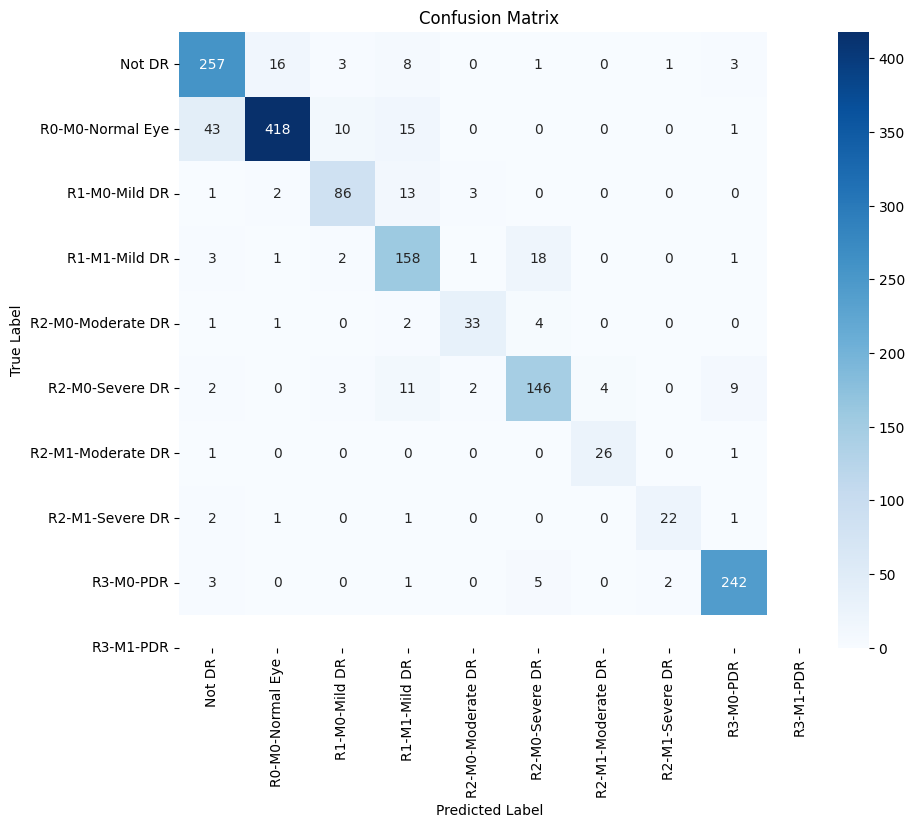

[0 0 0 ... 9 9 9]


ValueError: Number of classes, 9, does not match size of target_names, 10. Try specifying the labels parameter

In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report  # Import confusion_matrix here



y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices
y_true = train_data.classes                   # Get true class indices

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



# Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=list(test_data.class_indices.keys()), output_dict=True)

print("\nF1 Scores for Each Class:")
for class_name, metrics in class_report.items():
    if class_name not in ["accuracy", "macro avg", "weighted avg"]:
        print(f"Class '{class_name}': F1 Score = {metrics['f1-score']:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(test_data.class_indices.keys())))


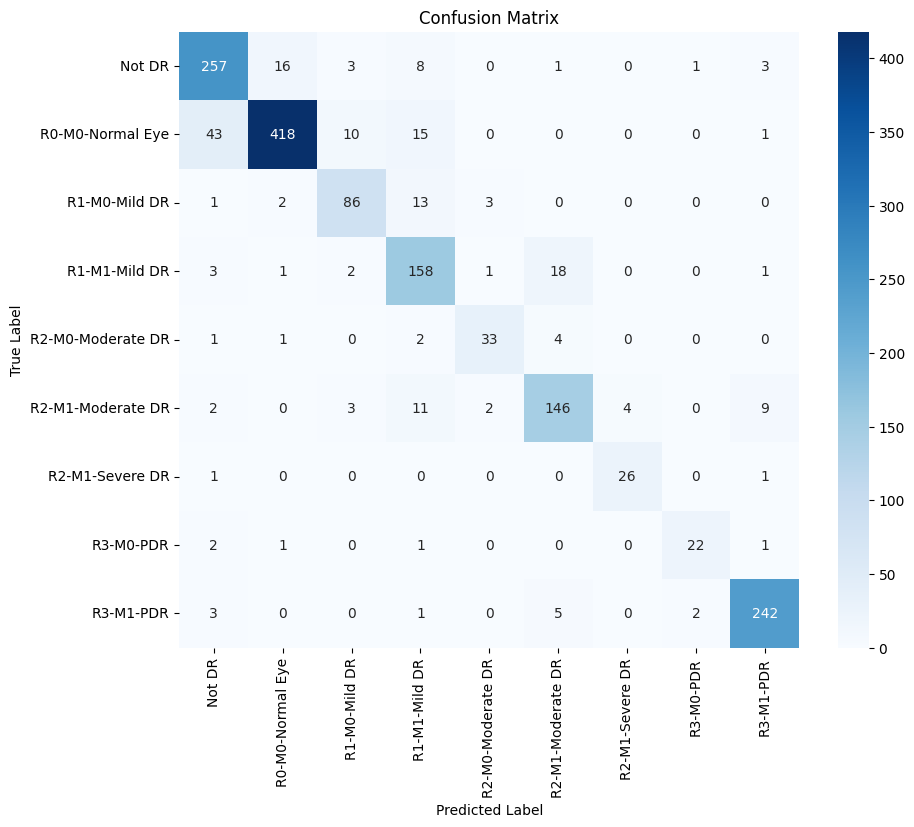


F1 Scores for Each Class:
Class 'Not DR': F1 Score = 0.8538
Class 'R0-M0-Normal Eye': F1 Score = 0.9028
Class 'R1-M0-Mild DR': F1 Score = 0.8230
Class 'R1-M1-Mild DR': F1 Score = 0.8041
Class 'R2-M0-Moderate DR': F1 Score = 0.8250
Class 'R2-M1-Moderate DR': F1 Score = 0.8319
Class 'R2-M1-Severe DR': F1 Score = 0.8966
Class 'R3-M0-PDR': F1 Score = 0.8462
Class 'R3-M1-PDR': F1 Score = 0.9472

Detailed Classification Report:
                   precision    recall  f1-score   support

           Not DR       0.82      0.89      0.85       289
 R0-M0-Normal Eye       0.95      0.86      0.90       487
    R1-M0-Mild DR       0.83      0.82      0.82       105
    R1-M1-Mild DR       0.76      0.86      0.80       184
R2-M0-Moderate DR       0.85      0.80      0.82        41
R2-M1-Moderate DR       0.84      0.82      0.83       177
  R2-M1-Severe DR       0.87      0.93      0.90        28
        R3-M0-PDR       0.88      0.81      0.85        27
        R3-M1-PDR       0.94      0.96   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ... (rest of your code)

y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices
y_true = test_data.classes                   # Get true class indices

# Get unique classes in predictions and true labels
unique_classes = np.unique(np.concatenate([y_true, y_pred_classes]))

# Filter target names to include only present classes
target_names = [
    class_name
    for class_name, class_index in test_data.class_indices.items()
    if class_index in unique_classes
]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes, labels=unique_classes)  # Specify labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=target_names, output_dict=True, labels=unique_classes)  # Specify labels and target_names

print("\nF1 Scores for Each Class:")
for class_name, metrics in class_report.items():
    if class_name not in ["accuracy", "macro avg", "weighted avg"]:
        print(f"Class '{class_name}': F1 Score = {metrics['f1-score']:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=target_names, labels=unique_classes))  # Specify labels and target_names

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


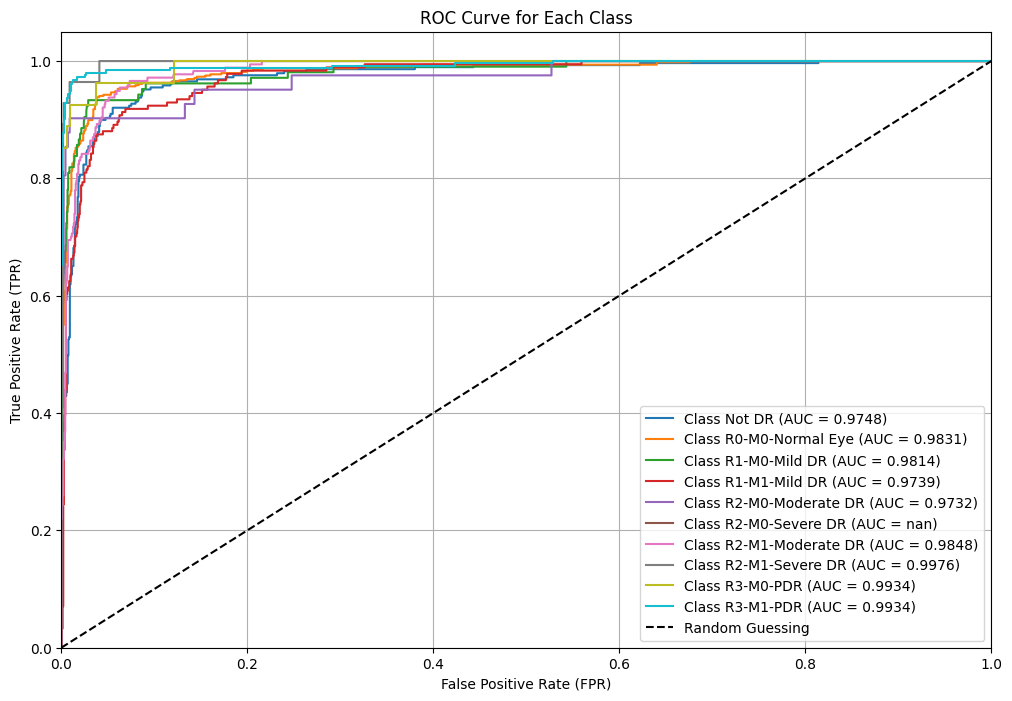

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output (one-hot encoding of the true labels)
y_true_binarized = label_binarize(y_true, classes=np.arange(len(test_data.class_indices)))

# ROC Curve for each class
plt.figure(figsize=(12, 8))

for i, class_name in enumerate(test_data.class_indices.keys()):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])  # Use y_pred for probabilities
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Class {class_name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report

# Set parameters
batch_size = 64
epochs = 30
img_height, img_width = 380, 380  # EfficientNetB4 input size
num_classes = 10  # Update as per your dataset
learning_rate = 0.0001  # Fine-tuning learning rate

# Data augmentation and data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    data_dir_val,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the pre-trained EfficientNetB4 model (excluding the top layer)
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Unfreeze the top layers of EfficientNetB4 for fine-tuning
for layer in base_model.layers[-100:]:
    layer.trainable = True

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)        # Global average pooling to reduce dimensionality
x = BatchNormalization()(x)            # Normalize after pooling
x = Dropout(0.5)(x)                    # Dropout to reduce overfitting

x = Dense(1024, activation='relu')(x)  # Fully connected layer with ReLU activation
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(512, activation='relu')(x)   # Another dense layer to learn complex patterns
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Output layer for 10 classes with softmax activation
output = Dense(num_classes, activation='softmax')(x)

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_efficientnetb4_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Save the model
model_save_path = '/content/drive/MyDrive/DRdataset/modelsforallclasses/efficientnetb4_model.keras'
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")




NameError: name 'data_dir' is not defined

In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report

# Enable mixed precision training for faster processing
tf.keras.mixed_precision.set_global_policy("mixed_float16")

# Set parameters
batch_size = 32
epochs = 30
img_height, img_width = 224, 224  # InceptionResNetV2 input size
learning_rate = 0.0001  # Fine-tuning learning rate

# Data augmentation and data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    data_dir_val,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Automatically compute class weights based on the training data
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)

class_weights = dict(enumerate(class_weights))
print(f"Computed Class Weights: {class_weights}")

# Load the pre-trained InceptionResNetV2 model (excluding the top layer)
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Unfreeze the top layers of InceptionResNetV2 for fine-tuning
for layer in base_model.layers[-100:]:
    layer.trainable = True

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Output layer for num_classes classes with softmax activation
num_classes = len(train_data.class_indices)
output = Dense(num_classes, activation='softmax')(x)

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with mixed precision optimizer
optimizer = Adam(learning_rate=learning_rate)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_inceptionresnetv2_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model with class weights
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    class_weight=class_weights  # Apply class weights
)

# Save the model
model_save_path = '/content/drive/MyDrive/DRdataset/modelsforallclasses/inceptionresnetv2_model.keras'
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")



Found 5910 images belonging to 10 classes.
Found 1279 images belonging to 10 classes.
Found 1264 images belonging to 10 classes.
Computed Class Weights: {0: 0.5538894095595126, 1: 0.3272425249169435, 2: 1.5310880829015545, 3: 0.8454935622317596, 4: 3.966442953020134, 5: 295.5, 6: 0.9009146341463414, 7: 5.737864077669903, 8: 5.794117647058823, 9: 0.6287234042553191}
219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - AUC: 0.5528 - accuracy: 0.1380 - loss: 2.9186 - precision: 0.1642 - recall: 0.0629 
Epoch 1: val_accuracy improved from -inf to 0.31509, saving model to best_inceptionresnetv2_model.keras
185/185 ━━━━━━━━━━━━━━━━━━━━ 5499s 29s/step - AUC: 0.5530 - accuracy: 0.1381 - loss: 2.9187 - precision: 0.1645 - recall: 0.0630 - val_AUC: 0.6968 - val_accuracy: 0.3151 - val_loss: 2.2406 - val_precision: 0.4851 - val_recall: 0.1658 - learning_rate: 1.0000e-04
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.6725 - accuracy: 0.2445 - loss: 2.7307 - precision: 0.3447 - recall: 0.1441
Epoch 2: val_accuracy improved from 0.31509 to 0.35496, saving model to best_inceptionresnetv2_model.keras
185/185 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - AUC: 0.6725 - accuracy: 0.2445 - loss: 2.7307 - precision: 0.3447 - recall: 0.1441 - val_AUC: 0.7822 - val_accuracy: 0.3550 - val_loss: 2.0100 - val_precision: 0.5272 - val_recall: 0.2502 - learning_rate: 1.00

In [ ]:
data_dir = "/content/drive/MyDrive/DRdataset/Split_Datasetforallclasses/train"

data_dir_val = "/content/drive/MyDrive/DRdataset/Split_Datasetforallclasses/val"
data_dir_test = "/content/drive/MyDrive/DRdataset/Split_Datasetforallclasses/test"

In [ ]:
# Data augmentation and data generators
img_height, img_width=224,224
batch_size=32
# Data augmentation and data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    data_dir_val,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 14001 images belonging to 10 classes.
Found 9403 images belonging to 10 classes.
Found 1591 images belonging to 10 classes.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

# List of your one-vs-rest class names
class_names = ['Not_DR']

model_dir = '/content/drive/MyDrive/DRdataset/models_per_class/'

# Loop through each class model
for class_name in class_names:
    print(f"\n🔍 Confusion Matrix for: {class_name}")

    # Load the trained model
    model_path = f"{model_dir}/densenet201_{class_name}.h5"
    model = load_model(model_path, compile=False)  # Avoid metric compilation warning

    # Extract labels and images from tf.data.Dataset
    y_true = []
    y_pred = []

    for batch in val_data:
        images, labels = batch[:2]  # Unpack only images and labels (ignore sample weights if present)

        probs = model.predict(images)
        preds = (probs > 0.5).astype(int).flatten()
        y_pred.extend(preds)
        y_true.extend(labels.numpy().astype(int).flatten())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Print classification report
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=["Not Present", "Present"]))

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Not Present", "Present"],
                yticklabels=["Not Present", "Present"])
    plt.title(f'Confusion Matrix: {class_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



🔍 Confusion Matrix for: Not_DR
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.mixed_precision import LossScaleOptimizer

model="/content/drive/MyDrive/DRdataset/modelsforallclasses/inceptionresnetv2_model.keras"
optimizer = LossScaleOptimizer(Adam(learning_rate=1e-4))
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
history_additional = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=[early_stopping, reduce_lr, checkpoint],  # Reuse your callbacks
    class_weight=class_weights  # Keep applying class weights
)

# Save the model again after additional training
model.save('/content/drive/MyDrive/DRdataset/modelsforallclasses/inceptionresnetv2_model.keras')
print("Training continued and model saved successfully!")




AttributeError: 'str' object has no attribute 'compile'

GAT GCN

In [ ]:
!pip install pillow
import os
import random
from PIL import Image # Import the PIL library
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint



# ... (rest of your code)

# Function to remove corrupted images (can be used for any directory)
def remove_corrupted_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Check if image is corrupted
                img.close() # Close the image to release resources
            except Exception as e:
                print(f"Corrupted file removed: {file_path}")
                os.remove(file_path)

# Call the function before creating your data generators
remove_corrupted_images(data_dir) # Remove from training directory
remove_corrupted_images(data_dir_val) # Remove from validation directory
remove_corrupted_images(data_dir_test) # Remove from test directory

# ... (code to create data generators - train_data, val_data)

# ... (rest of your code)

Corrupted file removed: /content/drive/MyDrive/DRdataset/Split_DatasetforallclassesV2/train/Not DR/IM002040.JPG


In [ ]:
# Evaluate the model
from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator


model_path = "/content/drive/MyDrive/DRdataset/modelsforallclasses/inceptionresnetv2_model.keras"
model = load_model(model_path)

# Evaluate the model and unpack all metrics

test_loss, test_acc, test_auc, test_precision, test_recall = model.evaluate(test_data)
print(f"Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}, AUC: {test_auc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")


# Predictions and Confusion Matrix
y_pred = model.predict(test_data)

50/50 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - AUC: 0.9235 - accuracy: 0.6559 - loss: 1.1354 - precision: 0.7668 - recall: 0.5204
Loss: 1.1328, Accuracy: 0.6103, AUC: 0.9273, Precision: 0.7545, Recall: 0.4714
50/50 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step


NameError: name 'np' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Ensure y_pred is a numpy array
y_pred = model.predict(val_data, verbose=1)

# Get predicted class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class indices from the validation data generator
y_true = val_data.classes

# Check the shapes to make sure they match
print(f"Shape of y_pred_classes: {y_pred_classes.shape}")
print(f"Shape of y_true: {y_true.shape}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_data.class_indices.keys(),
            yticklabels=val_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(val_data.class_indices.keys())))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  4/294 ━━━━━━━━━━━━━━━━━━━━ 1:15:11 16s/step

KeyboardInterrupt: 

Binary Model for each class

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing import image

# --- Setup ---
class_names = ["Not DR"]  # Update this list with your real classes
batch_size = 32
epochs = 30
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)



# --- Data Generators ---
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30, width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# --- Focal Loss ---
def binary_focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weight = alpha * y_true * tf.pow(1 - y_pred, gamma) + (1 - alpha) * (1 - y_true) * tf.pow(y_pred, gamma)
        return tf.reduce_mean(weight * cross_entropy)
    return focal_loss_fixed

# --- One-vs-Rest Loop ---
for idx, class_name in enumerate(class_names):
    print(f"\n🔍 Training One-vs-Rest model for: {class_name}")

    base_train = train_datagen.flow_from_directory(
        data_dir, target_size=(img_height, img_width), batch_size=batch_size,
        class_mode='categorical', shuffle=True
    )

    base_val = val_datagen.flow_from_directory(
        data_dir_val, target_size=(img_height, img_width), batch_size=batch_size,
        class_mode='categorical', shuffle=False
    )

    y_labels = base_train.classes
    binary_y = (y_labels == idx).astype(int)
    weights = compute_class_weight(class_weight='balanced', classes=np.unique(binary_y), y=binary_y)
    class_weights = {0: weights[0], 1: weights[1]}

    def make_binary_dataset(generator, class_index):
        def gen():
            for batch_x, batch_y in generator:
                yield batch_x, batch_y[:, class_index].astype(np.float32)

        output_signature = (
            tf.TensorSpec(shape=(None, img_height, img_width, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.float32)
        )
        return tf.data.Dataset.from_generator(gen, output_signature=output_signature)

    train_dataset = make_binary_dataset(base_train, idx).prefetch(tf.data.AUTOTUNE)
    val_dataset = make_binary_dataset(base_val, idx).prefetch(tf.data.AUTOTUNE)

    # --- Model Architecture ---
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers[-150:]:
        layer.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-4),
        loss=binary_focal_loss(gamma=2., alpha=0.25),
        metrics=['accuracy', 'AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )

    model_path = f'/content/drive/MyDrive/DRdataset/models_per_class/densenet201_{class_name.replace(" ", "_")}_focal.h5'
    checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, verbose=1)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # --- Train ---
    steps_per_epoch = len(base_train) // batch_size
    validation_steps = len(base_val) // batch_size
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs,
                        steps_per_epoch=steps_per_epoch, validation_steps=validation_steps,
                        class_weight=class_weights,
                        callbacks=[checkpoint, early_stopping, reduce_lr], verbose=1)

    print(f"✅ Saved model: {model_path}")

    # --- Confusion Matrix ---
    y_true, y_pred = [], []
    for batch_x, batch_y in val_dataset:
        y_true.extend(batch_y.numpy())
        preds = model.predict(batch_x).flatten()
        y_pred.extend((preds > 0.5).astype(int))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not DR", "DR"])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {class_name}')
    plt.show()

    # --- Grad-CAM ---
    def get_grad_cam(img_array, model, layer_name='conv5_block32_concat'):
        grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])
        with tf.GradientTape() as tape:
            conv_outputs, predictions = grad_model(img_array)
            loss = predictions[:, 0]

        grads = tape.gradient(loss, conv_outputs)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        conv_outputs = conv_outputs[0]
        heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
        heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
        return heatmap.numpy()

    # --- Grad-CAM Overlay ---
    sample_img_path = base_val.filepaths[0]
    img = image.load_img(sample_img_path, target_size=(img_height, img_width))
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)

    heatmap = get_grad_cam(img_array, model)
    heatmap = np.uint8(255 * heatmap)
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = tf.image.resize(heatmap, (img_height, img_width)).numpy().astype(np.uint8)
    heatmap_color = tf.keras.preprocessing.image.array_to_img(np.repeat(heatmap, 3, axis=-1))

    plt.imshow(img)
    plt.imshow(heatmap_color, alpha=0.5, cmap='jet')
    plt.title("Grad-CAM Overlay")
    plt.axis('off')
    plt.show()



🔍 Training One-vs-Rest model for: Not DR
Found 5910 images belonging to 10 classes.
Found 1279 images belonging to 10 classes.
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - AUC: 0.5200 - accuracy: 0.4876 - loss: 0.4099 - precision: 0.2123 - recall: 0.5072
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_Not_DR_focal.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 424s 10s/step - AUC: 0.5174 - accuracy: 0.4876 - loss: 0.4137 - precision: 0.2081 - recall: 0.5008 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.1699 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - AUC: 0.5501 - accuracy: 0.4886 - loss: 0.3701 - precision: 0.1578 - recall: 0.5924
Epoch 2: val_accuracy did not improve from 0.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - AUC: 0.5415 - accuracy: 0.4832 - loss: 0.3756 - precision: 0.1567 - recall: 0.5739 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.1402 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - AUC: 0.4746 - accuracy: 0.4502 - loss: 0.3755 - precision: 0.1447 - recall: 0.4873
Epoch 3: val_accuracy did not improve from 0.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 8s/step - AUC: 0.4892 - accuracy: 0.4543 - loss: 0.3692

5/5 ━━━━━━━━━━━━━━━━━━━━ 57s 14s/step - AUC: 0.4312 - accuracy: 0.4372 - loss: 0.4142 - precision: 0.1796 - recall: 0.4749 - val_AUC: 0.0000e+00 - val_accuracy: 0.0312 - val_loss: 0.0815 - val_precision: 1.0000 - val_recall: 0.0312 - learning_rate: 1.0000e-04
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - AUC: 0.4838 - accuracy: 0.4566 - loss: 0.3390 - precision: 0.1529 - recall: 0.3950 
Epoch 5: val_accuracy improved from 0.03125 to 0.96875, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_Not_DR_focal.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 80s 20s/step - AUC: 0.4934 - accuracy: 0.4628 - loss: 0.3478 - precision: 0.1569 - recall: 0.4070 - val_AUC: 0.0000e+00 - val_accuracy: 0.9688 - val_loss: 0.0572 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - AUC: 0.7082 - accuracy: 0.6294 - loss: 0.2529 - precision: 0.2690 - recall: 0.7021 
Epoch 6: val_accuracy improved from 0.96875 to 1.00000, saving model to /content/drive/MyDrive/DRdataset/models_per_class/densenet201_Not_DR_focal.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 78s 19s/step - AUC: 0.6999 - accuracy: 0.6245 - loss: 0.2576 - precision: 0.2665 - recall: 0.6885 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0480 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - AUC: 0.4980 - accuracy: 0.4419 - loss: 0.4023 - precision: 0.1248 - recall: 0.4297 
Epoch 7: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - AUC: 0.5059 - accuracy: 0.4474 - loss: 0.3940 - precision: 0.1289 - recall: 0.4523 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0611 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - AUC: 0.5415 - accuracy: 0.5665 - loss: 0.3680 - precision: 0.2294 - recall: 0.6129 
Epoch 8: val_accuracy did not improve from 1.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 77s 19s/step - AUC: 0.5493 - accuracy: 0.5700 - loss: 0.3621 - precis

KeyboardInterrupt: 

In [ ]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 33.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ========== Parameters ==========
batch_size = 32
epochs = 50
img_height, img_width = 224, 224
num_classes = 10
learning_rate = 1e-4

# ========== Dataset Paths ==========
# ========== Data Augmentation ==========
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    data_dir_val,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    data_dir_test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 5910 images belonging to 10 classes.
Found 1279 images belonging to 10 classes.
Found 1264 images belonging to 10 classes.


In [ ]:
# Evaluate the model
from tensorflow.keras.models import load_model

model_path = "/content/drive/MyDrive/DRdataset/modelsforallclasses/densenet201_model_improved.keras"
model = load_model(model_path)
results = model.evaluate(train_data)

for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")


185/185 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - AUC: 0.9869 - accuracy: 0.8904 - loss: 0.3820 - precision_2: 0.9022 - recall_2: 0.8786
loss: 0.4015
compile_metrics: 0.8838


In [ ]:
# Retrain and collect history
history = model.fit(train_data, validation_data=val_data, epochs=5)

# Plot loss/accuracy graphs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

Epoch 1/5
 69/185 ━━━━━━━━━━━━━━━━━━━━ 4:05 2s/step - AUC: 0.7962 - accuracy: 0.4217 - loss: 2.3275 - precision_2: 0.5145 - recall_2: 0.2962

KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load model
model_path = "/content/drive/MyDrive/DRdataset/modelsforallclasses/densenet201_model_improved.keras"
model = load_model(model_path)

# Get true labels and predicted probabilities
y_true = []
y_pred_probs = []

for batch in test_data:
    x_batch, y_batch = batch
    preds = model.predict(x_batch)
    y_true.append(y_batch)
    y_pred_probs.append(preds)

# Concatenate batches
y_true = np.concatenate(y_true)
y_pred_probs = np.concatenate(y_pred_probs)

# For single-label classification (convert to labels)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_true, axis=1)  # If one-hot encoded

# Classification report
print("Classification Report:\n", classification_report(y_true_labels, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy and loss
loss, acc = model.evaluate(test_data)
print(f"Loss: {loss:.4f}, Accuracy: {acc:.4f}")


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━

In [ ]:
# One-vs-Rest ROC curve
from sklearn.preprocessing import label_binarize

num_classes = y_true.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Save history as a .pkl file
import pickle
with open('/content/drive/MyDrive/DRdataset/modelsforallclasses/densenet201_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
print(test_acc)

# Predictions and Confusion Matrix
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices
y_true = val_data.classes                   # Get true class indices

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(train_data.class_indices.keys())))

NameError: name 'test_acc' is not defined